In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question 0/ Perceptron

## Perceptron Batch

In [2]:
def perceptron_batch(P, N, X, tau, alpha):
    # Initialisation des poids W
    W = np.random.uniform(-1,1,(N+1,1))
    stop = False
    IT = 0
    while not stop:
        IT += 1
        Dw = np.zeros((N+1,1))
        ones = np.ones((P,1))
        X_new = np.append(ones,X,axis=1)
        y = np.sign(X_new@W)
        # Vérifiation si tout les données ont été bien classifié
        if np.array_equal(y,tau):
            stop = True
        else:
            # Mise à jour des poids
            Dw = alpha*X_new.T@(tau - y)
            W = W + Dw
            
    return W, IT
            

## Perceptron Online

In [3]:
def perceptron_online(P, N, X, tau, alpha):
    # Initialisation des poids W
    W = np.random.uniform(-1,1,(N+1,1))
    Dw = np.zeros((N+1,1))
    ones = np.ones((P,1))
    X_new = np.append(ones,X,axis=1)
    stop = False
    IT = 0
    while not stop:
        for k in range(P):
            IT += 1
            y = np.sign(X_new[k]@W)
            if y != tau[k]:
                # Mise à jour des poids
                Dw = alpha*(tau[k] - y)*X_new[k].reshape((N+1,1))
                W = W + Dw
            # Vérifiation si tout les données ont été bien classifié
            if np.array_equal(np.sign(X_new@W),tau):
                stop = True
                break
            
    return W, IT

## Plotting the data and the separation plan

In [4]:
def plot_(X, tau, W, title):
    d = np.unique(tau)
    for k in d:
        data = X[tau.squeeze()==k]
        plt.scatter(data[:,0],data[:,1])
    slope = -(W[0]/W[2])/(W[0]/W[1])  
    intercept = -W[0]/W[2]
    t = np.linspace(min(X[:,0]),max(X[:,0]),30)
    plt.plot(t,t*slope + intercept,'.r')
    plt.title(title)
    plt.show()

## Data

In [5]:
P = 4 # Nombre d'exemple de données
N = 2 # Dimension des données
alpha = 1

# Initialisation des données d'entrainement
X = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
tau_ET = np.array([[-1],[-1],[-1],[1]])
tau_OU = np.array([[-1],[1],[1],[1]])

P2 = 6
X_Exemple = np.array([[5,-1],[2,6],[3, 3],[2, 1],[-1,1],[1,-2]])
tau_Exemple = np.array([[1],[1],[1],[-1],[-1],[-1]])

## Test Batch Perceptron

W_ET =  
 [[-2.33576759]
 [ 2.87244842]
 [ 1.49507781]]
W_OU =  
 [[3.22977048]
 [3.31067908]
 [3.78597968]]
W_Exemple =  
 [[-13.61049935]
 [  5.62533254]
 [  0.88730371]]


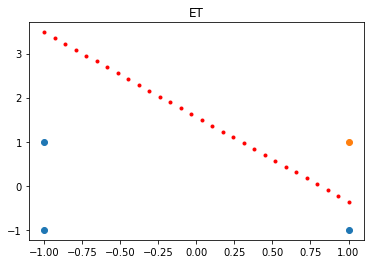

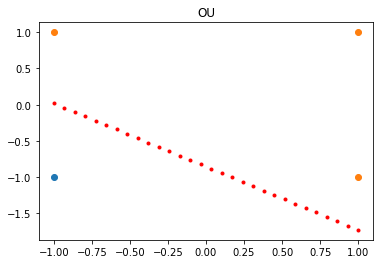

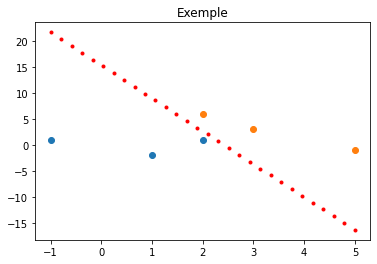

In [6]:
# Calcul des perceptrons W pour ET, OU et un ensemble d'exemples du cours
W_ET, _ = perceptron_batch(P, N, X, tau_ET, alpha)

W_OU, _ = perceptron_batch(P, N, X, tau_OU, alpha)

W_Exemple, _ = perceptron_batch(P2, N, X_Exemple, tau_Exemple, alpha)

print('W_ET = ','\n', W_ET)
print('W_OU = ','\n', W_OU)
print('W_Exemple = ','\n', W_Exemple)

plot_(X,tau_ET,W_ET,'ET')
plot_(X,tau_OU,W_OU,'OU')
plot_(X_Exemple,tau_Exemple,W_Exemple,'Exemple')

## Test Online Perceptron

W_ET =  
 [[-1.92051017]
 [ 2.69437857]
 [ 2.27012907]]
W_OU =  
 [[2.2180894 ]
 [2.74043918]
 [1.16060747]]
W_Exemple =  
 [[-12.55058414]
 [  5.33257111]
 [  0.47538707]]


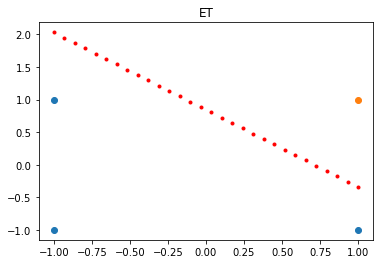

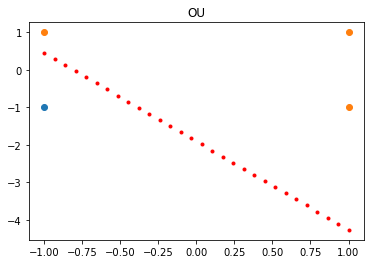

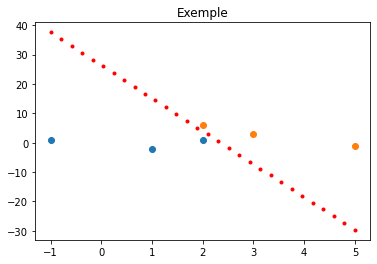

In [7]:
# Calcul des perceptrons W pour ET, OU et un ensemble d'exemples du cours
W_ET, _ = perceptron_online(P, N, X, tau_ET, alpha)

W_OU, _ = perceptron_online(P, N, X, tau_OU, alpha)

W_Exemple, _ = perceptron_online(P2, N, X_Exemple, tau_Exemple, alpha)

print('W_ET = ','\n', W_ET)
print('W_OU = ','\n', W_OU)
print('W_Exemple = ','\n', W_Exemple)

plot_(X,tau_ET,W_ET,'ET')
plot_(X,tau_OU,W_OU,'OU')
plot_(X_Exemple,tau_Exemple,W_Exemple,'Exemple')

# Question 1/ Données LS aléatoires.

In [8]:
# Génération de l'ensemble des données et du Perceptron Professeur
def generate_X_and_W(P, N):
    W = np.random.uniform(-1,1,(N+1,1))
    X = np.random.uniform(-1,1,(P,N))
    ones = np.ones((P,1))
    X = np.append(ones,X,axis=1)
    return X, W

# Calcul du tau 
def compute_tau(X,W):
    return np.sign(X@W)

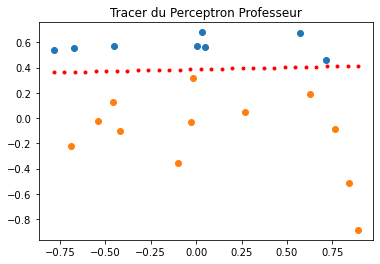

In [9]:
P = 20
N = 2
alpha = 1
# Tant que le Perceptron Professeur ne sépare pas l'ensemble des données en deux classe, continuer à générer les X et W
while True:
    X, W_star = generate_X_and_W(P, N)
    tau = compute_tau(X,W_star)
    if len(np.unique(tau) == 2):
        break
        
plot_(X[:,1:],tau,W_star,'Tracer du Perceptron Professeur')

# Question 2/ Apprentissage

###  Computing R 

Ici La formule devrait probablement être <b> R = cos(α) = a · b / (|a| * |b|)</b>. <br/>
Car en faisant <b>cos [ ( W* · W ) / | W* |·| W | ]</b> , Nous faison <b>cos(cos(α))</b>

In [10]:
def compute_recouvrement(W_star, W):
    return np.cos((W_star.T@W)/(np.linalg.norm(W_star)*np.linalg.norm(W)))

### Plotting the comparaison between W*, W_Online and W_Batch

In [11]:
def plot_comparaison(X, tau, W_star, W_online, W_batch, title):
    d = np.unique(tau)
    for k in d:
        data = X[tau.squeeze()==k]
        plt.scatter(data[:,0],data[:,1])
        
    slope_star = -(W_star[0]/W_star[2])/(W_star[0]/W_star[1])  
    intercept_star = -W_star[0]/W_star[2]
    
    slope_online = -(W_online[0]/W_online[2])/(W_online[0]/W_online[1]) 
    intercept_online = -W_online[0]/W_online[2]
    
    slope_bath = -(W_batch[0]/W_batch[2])/(W_batch[0]/W_batch[1]) 
    intercept_batch = -W_batch[0]/W_batch[2]
    
    t = np.linspace(min(X[:,0]),max(X[:,0]),30)
    plt.plot(t,t*slope_star + intercept_star,'.r', label='Professeur')
    plt.plot(t,t*slope_online + intercept_online,'.g', label='Elève Online')
    plt.plot(t,t*slope_bath + intercept_batch,'.b', label='Elève Batch')
    plt.title(title)
    plt.legend()
    plt.show()

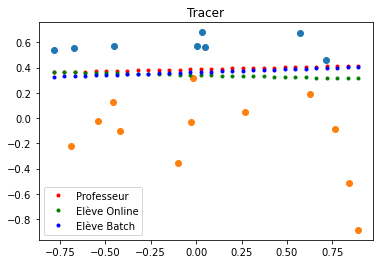

In [12]:
W_online, IT_online = perceptron_online(P, N, X[:,1:], tau, alpha) # Calcule du Perceptron Elève Online
W_batch, IT_batch = perceptron_batch(P, N, X[:,1:], tau, alpha) # Calcule du Perceptron Elève Batch
plot_comparaison(X[:,1:],tau,W_star,W_online,W_batch,'Tracer') # Affichage des des trois Percptrons, Professeur, Elève Online et Batch

In [13]:
print('Recouvrement Elève Online: ', compute_recouvrement(W_star, W_online).squeeze()) # Recouvrement entre Perceptrons Professeur et Elève Online
print('Recouvrement Elève Batch: ',compute_recouvrement(W_star, W_batch).squeeze())  # Recouvrement entre Perceptrons Professeur et Elève Batch

Recouvrement Elève Online:  0.5423769427213888
Recouvrement Elève Batch:  0.5405606718208065


# Question 3/ Tests

In [14]:
def test_online(P, N, Nb_tirage):
    IT_moy = 0
    R_moy = 0
    
    for k in range(Nb_tirage):
        X, W_star = generate_X_and_W(P, N)
        tau = compute_tau(X,W_star)
        W_online, IT_online = perceptron_online(P, N, X[:,1:], tau, alpha)
        IT_moy += IT_online 
        R_moy += compute_recouvrement(W_star, W_online)
        
    IT_moy = IT_moy/Nb_tirage
    R_moy = R_moy/Nb_tirage
    
    return IT_moy, R_moy

def test_batch(P, N, Nb_tirage):
    IT_moy = 0
    R_moy = 0
    
    for k in range(Nb_tirage):
        X, W_star = generate_X_and_W(P, N)
        tau = compute_tau(X,W_star)
        W_batch, IT_batch = perceptron_batch(P, N, X[:,1:], tau, alpha)
        IT_moy += IT_batch 
        R_moy += compute_recouvrement(W_star, W_batch)
        
    IT_moy = IT_moy/Nb_tirage
    R_moy = R_moy/Nb_tirage
    
    return IT_moy, R_moy

## Data to iterate on

In [15]:
N = [ 5, 10, 100, 1000]
P = [10, 100, 500, 5000]
Nb_tirage = 50

In [16]:
for n in N:
    for p in P:
        result_online = test_online(p, n, Nb_tirage)
        result_batch = test_batch(p, n, Nb_tirage)
        print('Online |','N = ',n,' P = ', p, ' IT moyenne = ',result_online[0], '; R moyenne = ',result_online[1].squeeze())
        print('Batch  |','N = ', n,' P = ', p, ' IT moyenne = ',result_batch[0], '; R moyenne = ',result_batch[1].squeeze())

Online | N =  5  P =  10  IT moyenne =  21.48 ; R moyenne =  0.7232400685407118
Batch  | N =  5  P =  10  IT moyenne =  4.48 ; R moyenne =  0.7013390226872196
Online | N =  5  P =  100  IT moyenne =  2593.2 ; R moyenne =  0.551626803795127
Batch  | N =  5  P =  100  IT moyenne =  18.12 ; R moyenne =  0.5471279179212114


KeyboardInterrupt: 